## Recommendations in notebook writing

Notebooks are a great tool for data and model exploration. But in that process a lot of Python garbage can get into them as a consequence of the trial and error process.

But once these tasks are done and one arrives to final ideas and insights on the problem under study, the notebook should be **thoroughly cleaned** and the notebook should **concentrate on the insights and conclussions** without, of course, throwing away the good work done.

Below there are a few guidelines about this.

* Put the useful bits of your code as functions on a **Python module** (plus script, if needed) that is imported at the notebook's beginning. 
* Of course that module should be **properly documented** and **formatted** (try to learn about PEP 8 if you are going to write a lot of Python).
* Leave in the notebook **as little code as possible**, ideally one- or two-line cells calling a function, plotting results or so on.
* **Avoid boilerplate code**. If needed, put it in a module.
* Put on the notebook some way to **hide/display the code** (as shown below).
* The displayed information **should be just that, informative**. So forget about large tables, long output cells, dataframe or array displays and so on.
* Emphasize **insights and conclusions**, using as much markdown as needed to clarifiy and explain them.
* Make sure that **number cells consecutively starting at 1.**
* And, of course, make sure that **there are no errors left**. To avoid these last pitfalls, run `Kernel\Restart Kernel and Run All Cells`.

And notice that whoever reads your notebook is likely to toggle off your code and consider just the markdown cells. Because of this, once you feel that your notebook is finished,
* let it rest for one day, 
* then open it up, toggle off the code 
* and read it to check **whether it makes sense to you**.

If this is not the case, **the notebook is NOT finished!!!**

Following these rules you are much more likely to get good grades at school (and possibly also larger bonuses at work).

In [1]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show or hide your raw code."></form>
''')

# Simple Data Analysis and Linear and MLP Regression Modelling

## The `housing` problem

We want to predict median house values in areas of Boston.

Accesible en https://archive.ics.uci.edu/ml/datasets/Housing

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import time
import pickle
import gzip

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

## Data Loading

The dataset is preloaded in the sciki-learn library.

In [4]:
boston_data = load_boston()

df_housing = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df_housing['MEDV'] = boston_data['target']

print ("nFilas: %d\tnColumnas: %d\n" % (df_housing.shape[0], df_housing.shape[1]) )
print ("Columnas:\t", np.array(df_housing.columns))

nFilas: 506	nColumnas: 14

Columnas:	 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms

### Descriptive analysis

In [5]:
df_housing.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


There are no  missing values and feature ranges appear to be reasonable.

## Boxplots, histograms and scatterplots

### Boxplots

We normalize the data so that all boxplots are in a similar scale.

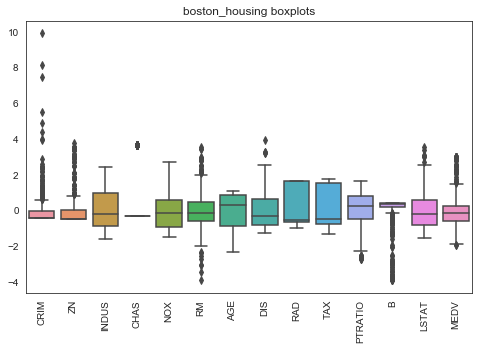

In [6]:
#normalizamos para tener rangos uniformes en histogramas
df_housing_normalizado = (df_housing - df_housing.mean()) / df_housing.std() 

plt.figure( figsize=(8, 5))
sns.set_style("white")
#bx_plot = sns.boxplot(data=df_housing)
bx_plot = sns.boxplot(data=df_housing_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.title("boston_housing boxplots")
plt.xticks(rotation=90)
plt.show()

### Histograms and scatterplots

Histograms and scatter plots against the target of first 7 fatures.

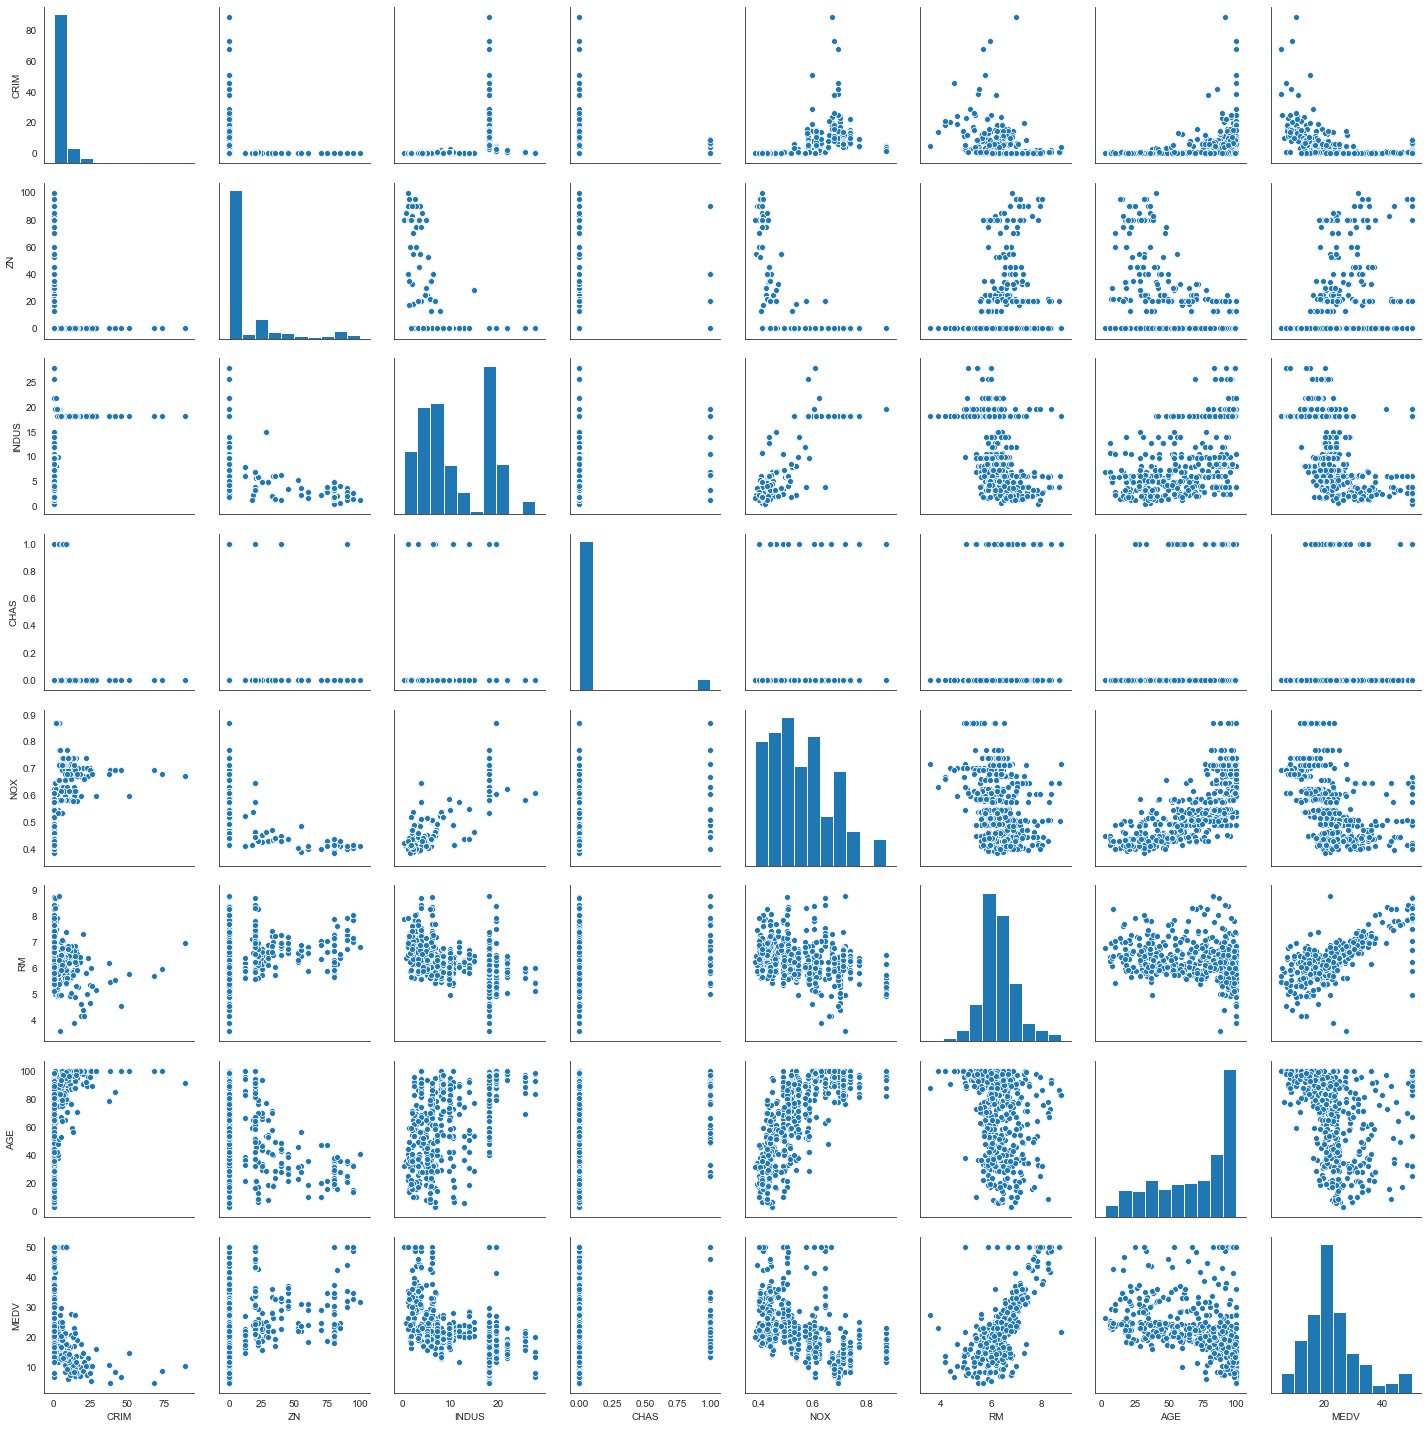

In [7]:
vars_housing   = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', \
                  'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_housing = ['MEDV']

num_vars_to_show = 7 
pair_plot = sns.pairplot( df_housing[ vars_housing[ : num_vars_to_show] + target_housing] )
plt.show()

Histograms and scatter plots against the target of remaining features.

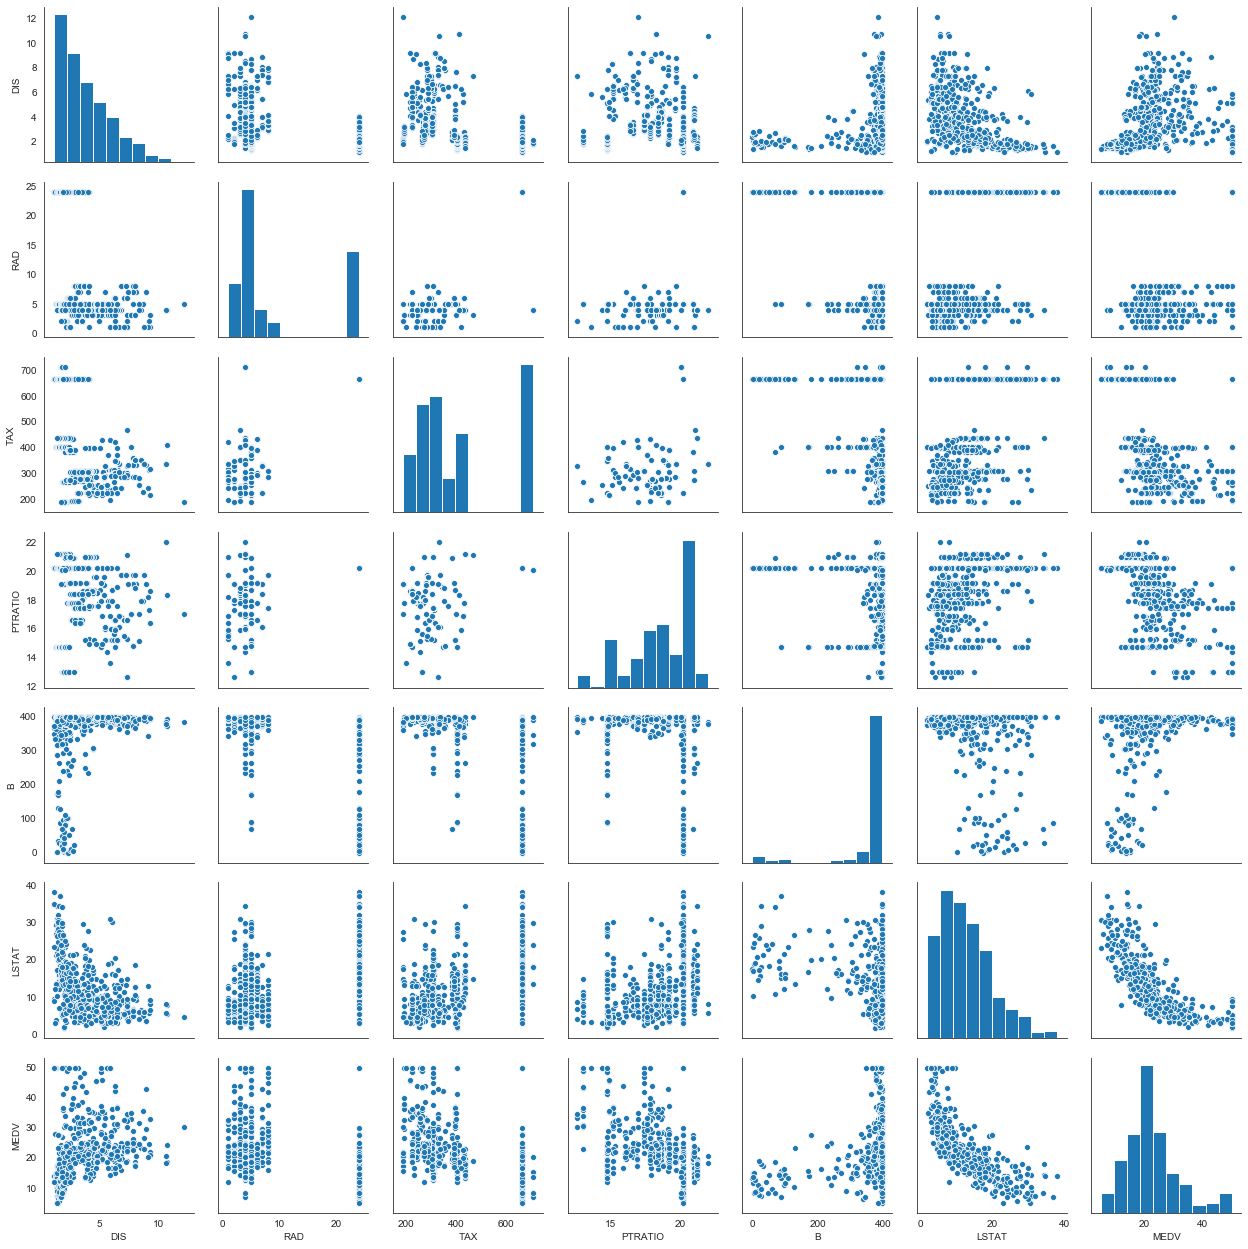

In [8]:
pair_plot = sns.pairplot( df_housing[ vars_housing[ 7: ] + target_housing] )
plt.show()

**Some observations:**
* A few variables seem to have a linear relationship with the target.
* The target histogram has a marked right tail.

### Correlations

In [9]:
df_housing.corr().round(decimals=3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


A picture (or a heatmap) is worth a thousand words.

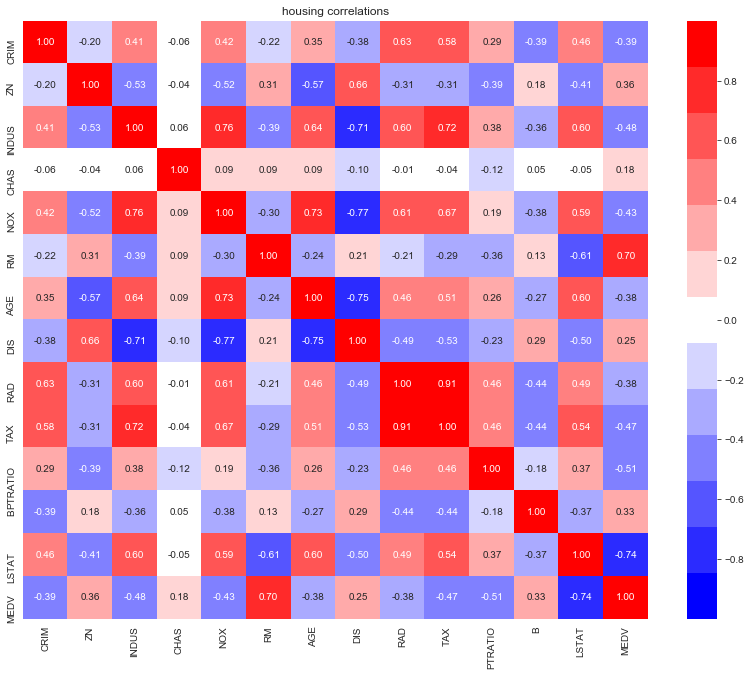

In [10]:
# definir el color map
n_colors = 13
cMap = plt.cm.get_cmap("bwr",lut=n_colors ) 

# definir el heatmap
fig = plt.figure( figsize=(14, 11))
plt.title('housing correlations')
h_map = sns.heatmap(df_housing.corr().values, 
                    vmin=-1., vmax=1., 
                    cmap=cMap,
                    annot=True,
                    fmt='.2f',
                    xticklabels=list(df_housing.columns),
                    yticklabels=list(df_housing.columns))
plt.xticks(rotation=90) 

# poner ticks en la barra de color
cbar = h_map.collections[0].colorbar
l_ticks = [k/10. for k in range(-8, 9, 2)]
cbar.set_ticks(l_ticks)

# arreglar cosillas
bottom, top = h_map.get_ylim()
h_map.set_ylim(bottom + 0.5, top - 0.5)

# generar el dibujo
plt.show()

The last row (or column) shows which features are likely to have a greater influence.

We see it also below.

In [11]:
print( ( df_housing.corr()['MEDV'].abs().round(3).sort_values(ascending=False).T) )

MEDV       1.000
LSTAT      0.738
RM         0.695
PTRATIO    0.508
INDUS      0.484
TAX        0.469
NOX        0.427
CRIM       0.388
RAD        0.382
AGE        0.377
ZN         0.360
B          0.333
DIS        0.250
CHAS       0.175
Name: MEDV, dtype: float64


## Ridge Regression

To get started, we define and fit a first model, plot its coefficients and measure errors (though not in a correct way).

model intercept: 22.532806


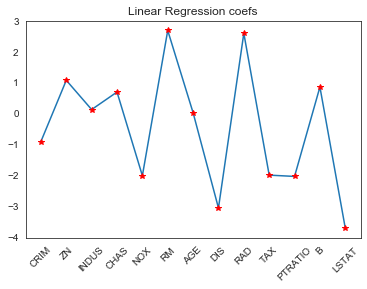

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ].values )
y = df_housing[ target_housing ].values

lr_m =  Ridge()
#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("model intercept: %f" % lr_m.intercept_)

#nticks = len(lr_m.coef_)
plt.xticks(range(len(vars_housing)), vars_housing, rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_.T, '-', lr_m.coef_.T, 'r*')

MAE: 3.226	R^2: 0.741


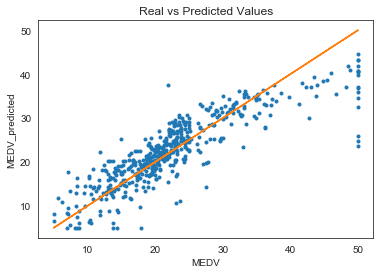

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = np.clip(lr_m.predict(x), 5.,  50.)

print("MAE: %.3f\tR^2: %.3f" % (mean_absolute_error(y, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

### Estimating model performance

We get a more realistic evaluation through Cross Validation over 10 random folds.

In [14]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(n_folds, shuffle=True)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf, n_jobs=2)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))
print("scores:\n", -np.round(scores, 3))

mae_mean: 3.388		mae_std: 0.439
scores:
 [3.159 3.847 2.452 3.393 3.571 3.018 3.282 4.13  3.412 3.615]


### Finding the optimal `alpha` by Grid Search CV

 We select the ridge parameter `alpha` by CV.

In [15]:
# select alpha in ridge regression by CV
# First iteration to find alpha
from sklearn.model_selection import GridSearchCV

# define folds
n_folds = 10
kf = KFold(n_folds, shuffle=True)

# define param_grid
l_alpha = [2.**k for k in range(-6, 10)]
param_grid = {'alpha': l_alpha}

# define grid search
lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, 
                                  param_grid=param_grid, 
                                  cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, 
                                  verbose=1)

_ = ridge_alpha_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:    0.1s finished


### Analyzing GridSearchCV results

We check the adequacy of the best hyperparameter and plot the CV errors with respect to `alpha`.

alpha_range: 0.02 - 512.00
alpha = 32.00
best_cv_mae = 3.335


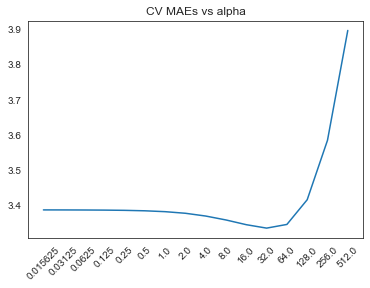

In [16]:
print("alpha_range: %.2f - %.2f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))
print('alpha = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.title("CV MAEs vs alpha")
plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

### Repeat if needed

We perform a second grid search on a narrower region around the optimum `alpha` just found.

In [17]:
#Segunda iteración: recentramos alpha y refinamos la búsqueda
kf = KFold(n_folds, shuffle=True)

l_alpha = [32. * 2.**(k/2.) for k in range(-5, 4)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
cv_estimator = GridSearchCV(lr_m, 
                            param_grid=param_grid, 
                            cv=kf, 
                            scoring='neg_mean_absolute_error',
                            n_jobs=2, 
                            verbose=1)

_ = cv_estimator.fit(x, y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Analyzing the CV results

We recheck on the adequacy of the best hyperparameter and plot the CV errors with respect to `alpha`.

alpha_range: 5.66 - 90.51
alfa = 32.00
best_cv_mae = 3.335


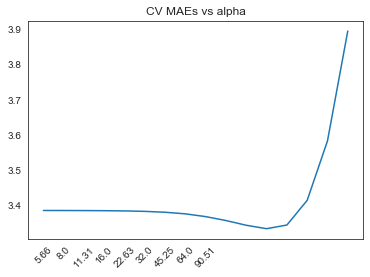

In [18]:
print("alpha_range: %.2f - %.2f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.title("CV MAEs vs alpha")
plt.xticks(range(len(l_alpha)), np.round(l_alpha, 2), rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

## Testing the final model

We do it first by CV.

In [19]:
best_alpha = ridge_alpha_search.best_params_['alpha']
lr_m = Ridge(alpha=best_alpha)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf, n_jobs=2)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

mae_mean: 3.347		mae_std: 0.571


We can get CV fold predictions with `cross_val_predict`.

In [20]:
from sklearn.model_selection import cross_val_predict

y_pred = np.clip( cross_val_predict(lr_m, x, y, cv=kf), 5., 50.)

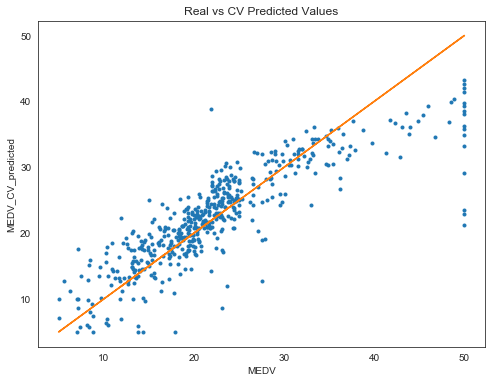

In [21]:
plt.figure( figsize=(8,6))

plt.title('Real vs CV Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_CV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

### Residual histograms and relationship with targets

mae: 3.290


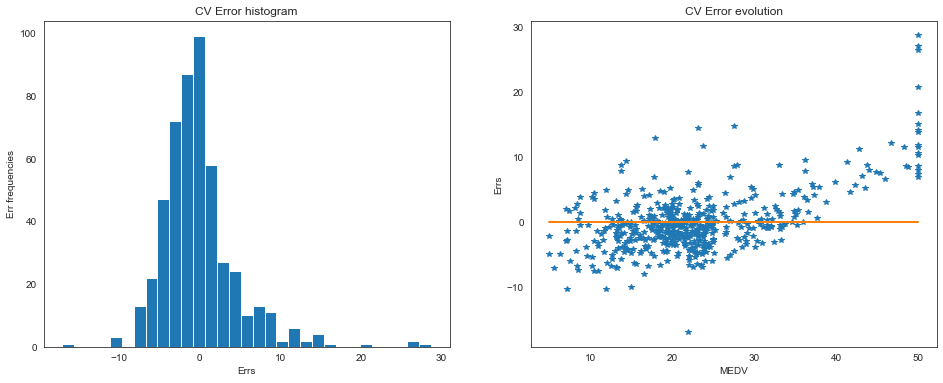

In [22]:
err = y - y_pred

print("mae: %.3f" % (abs(err).mean()) )

plt.figure( figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CV Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(err, bins=31)

plt.subplot(1,2,2)
plt.title("CV Error evolution")
plt.xlabel("MEDV")
plt.ylabel("Errs")
_ = plt.plot(y, err, '*', y, 0.*y, '-')

plt.show()

Some conclusions:

* The histogram has a moderate peak near 0 (but not there).
* The residuals show some correlation with the target.
* The residuals' variance seems to vary along the target.